<a href="https://colab.research.google.com/github/Malin-C/StockMarket/blob/main/StockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [86]:
stock_list = ['AAPL', 'GOOG', 'SPCE', 'TSLA', 'SPY']

start = '2018-01-01'
end = datetime.now()

In [49]:
AAPL = DataReader('AAPL', 'yahoo', start, end); AAPL['Name'] = 'AAPL'
GOOG = DataReader('GOOG', 'yahoo', start, end); GOOG['Name'] = 'GOOG'
SPCE = DataReader('SPCE', 'yahoo', start, end); SPCE['Name'] = 'SPCE'
TSLA = DataReader('TSLA', 'yahoo', start, end); TSLA['Name'] = 'TSLA'
SPY = DataReader('SPY', 'yahoo', start, end); SPY['Name'] = 'SPY'

stock_data = [ AAPL, GOOG, SPCE, TSLA, SPY ]

In [40]:
# Summary
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,68.097248,66.493212,67.282446,67.329617,1.342968e+08,66.439934
std,28.692950,27.753744,28.283660,28.237660,6.048533e+07,28.595224
min,36.430000,35.500000,35.994999,35.547501,4.544800e+07,34.669640
25%,47.092501,46.302500,46.615000,46.698750,9.239960e+07,45.414961
50%,55.240002,54.154999,54.607498,54.582500,1.190936e+08,53.287582
75%,80.055000,78.910000,79.447498,79.570000,1.580960e+08,78.959099
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [41]:
# info
print(AAPL.info())
print(AAPL.describe())
print(AAPL.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2018-01-02 to 2021-02-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
 6   Name       783 non-null    object 
dtypes: float64(6), object(1)
memory usage: 48.9+ KB
None
             High         Low        Open       Close        Volume   Adj Close
count  783.000000  783.000000  783.000000  783.000000  7.830000e+02  783.000000
mean    68.097248   66.493212   67.282446   67.329617  1.342968e+08   66.439934
std     28.692950   27.753744   28.283660   28.237660  6.048533e+07   28.595224
min     36.430000   35.500000   35.994999   35.547501  4.544800e+07   34.669640
25%     47.092501   46.302500   46.615000   46.698750  9.23

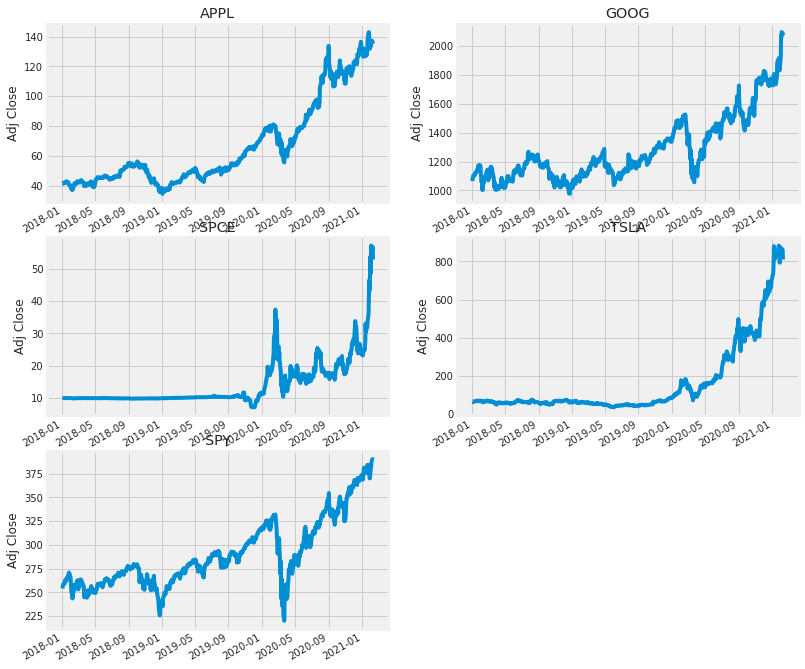

In [55]:
# Plot the stock close

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_data, 0):
  plt.subplot(3, 2, i+1)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"{stock_list[i]}")

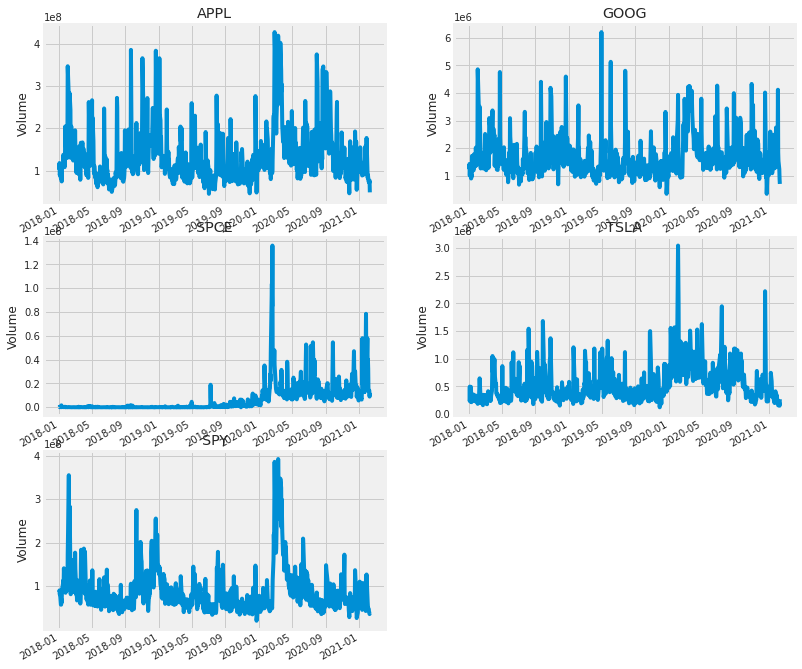

In [56]:
# Plot the stock volume

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_data, 0):
  plt.subplot(3, 2, i+1)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"{stock_list[i]}")

In [57]:
# Moving average

ma_day = [10, 20, 50]

for ma in ma_day:
    for stock in stock_data:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()

In [60]:
# create 1 df with all stocks
df = pd.concat(stock_data, axis=0)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-02-04,386.239990,381.970001,382.959991,386.190002,47142600.0,386.190002,SPY,379.899005,379.877003,372.155811
2021-02-05,388.470001,386.140015,388.200012,387.709991,48620300.0,387.709991,SPY,380.382004,380.307503,372.791156
2021-02-08,390.559998,388.350006,389.269989,390.510010,38365200.0,390.510010,SPY,380.994003,380.770003,373.367791
2021-02-09,390.890015,389.170013,389.609985,390.250000,35551100.0,390.250000,SPY,381.640002,381.348003,373.950377
2021-02-10,392.279999,387.500000,392.119995,389.711090,37046453.0,389.711090,SPY,383.170111,381.895058,374.502071


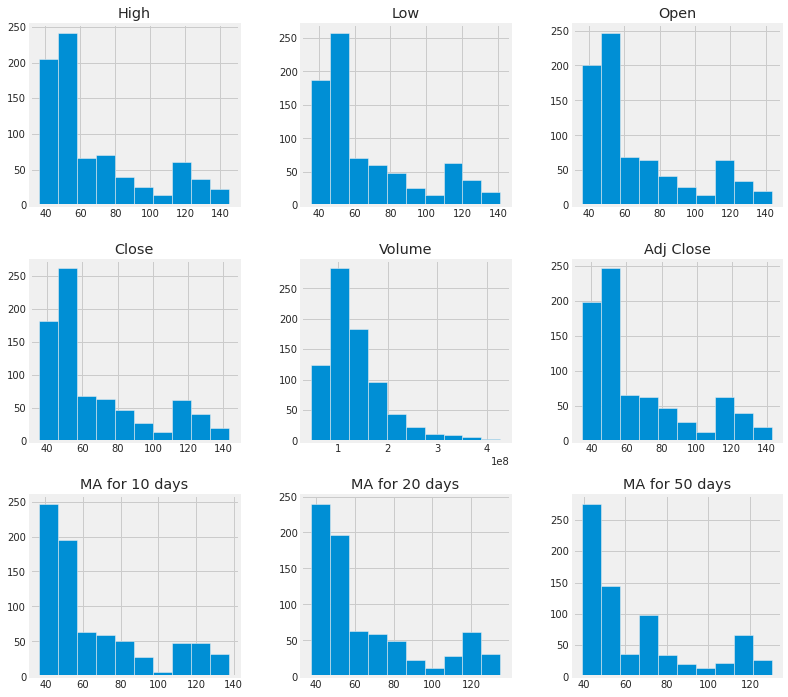

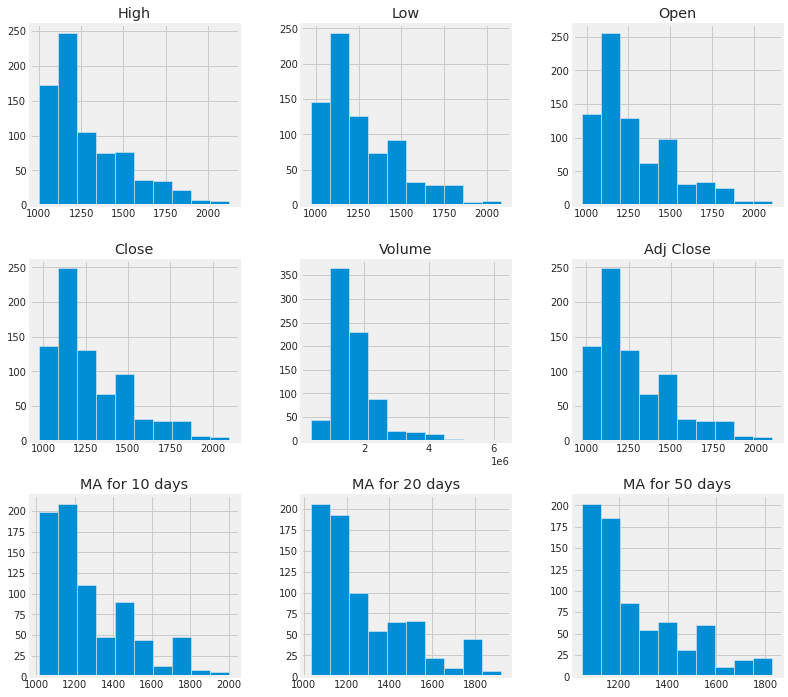

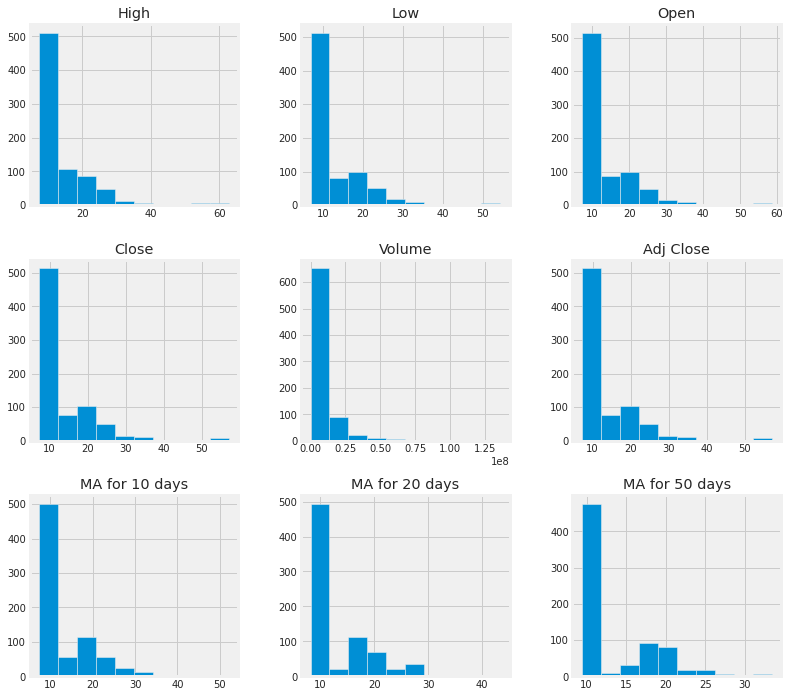

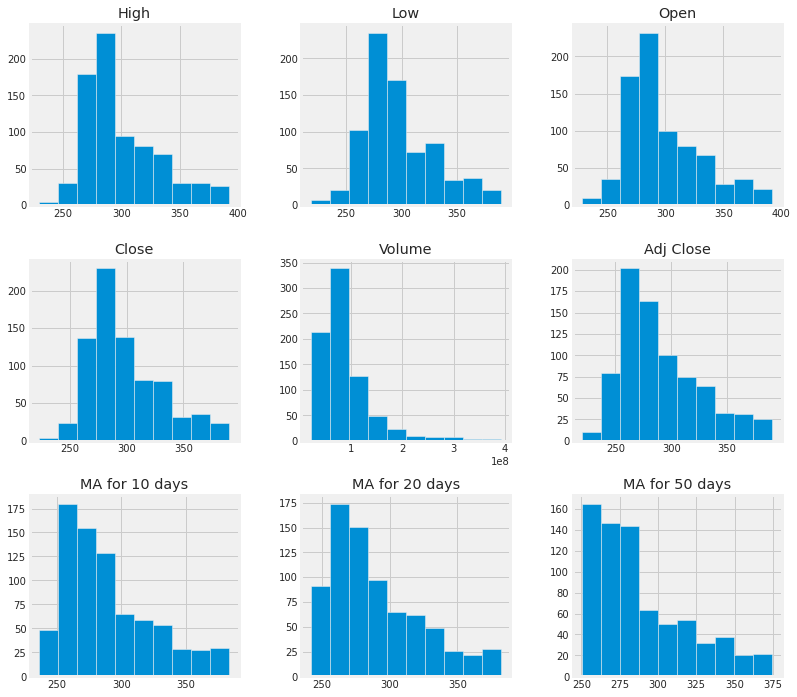

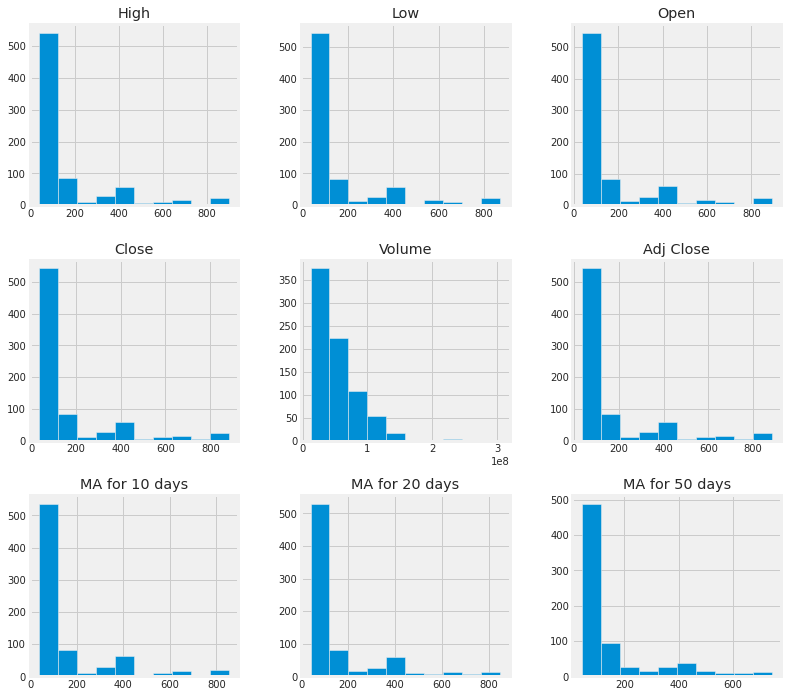

In [61]:
df.groupby("Name").hist(figsize=(12, 12));

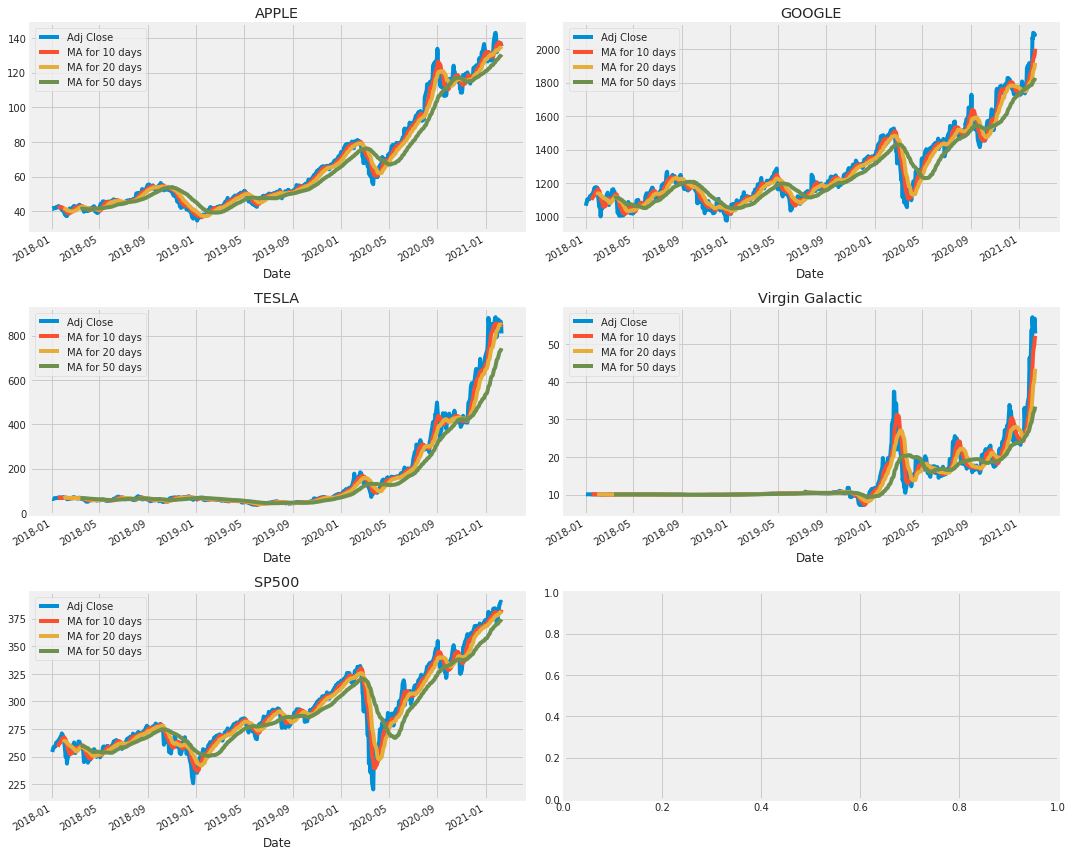

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

SPCE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Virgin Galactic')

SPY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('SP500')

fig.tight_layout()

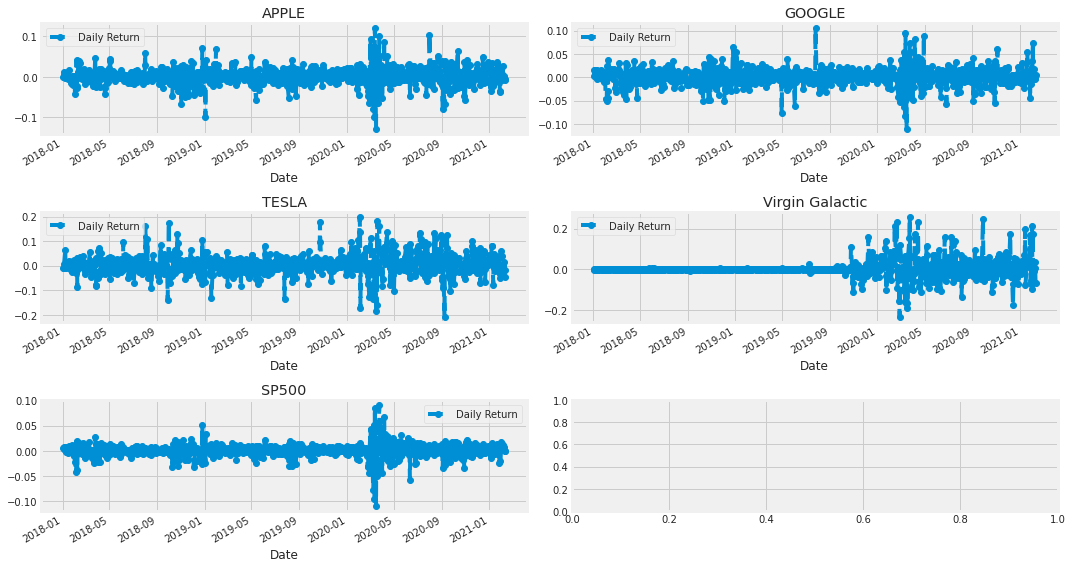

In [72]:
# We'll use pct_change to find the percent change for each day
for stock in stock_data:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

SPCE['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Virgin Galactic')

SPY['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('SP500')


fig.tight_layout()

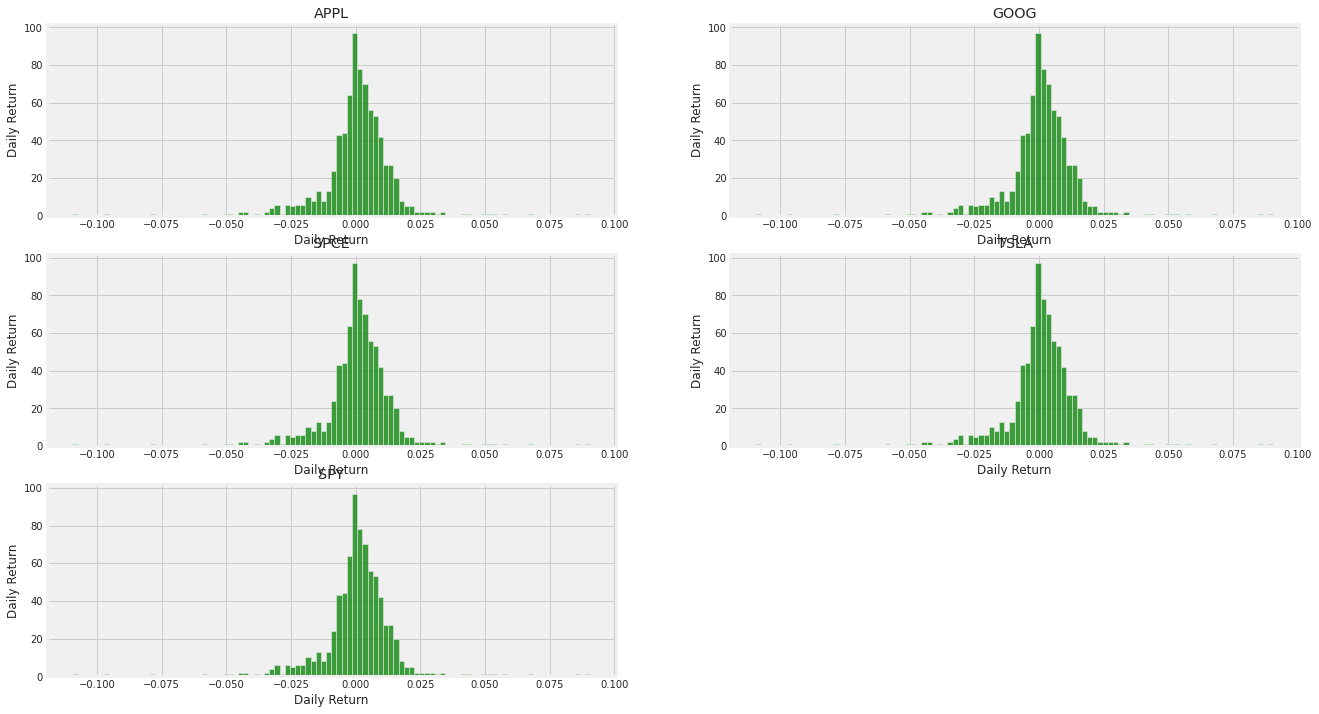

In [83]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(20, 12))

for i, stock in enumerate(stock_data, 0):
    plt.subplot(3, 2, i+1)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='green')
    plt.ylabel('Daily Return')
    plt.title(f'{stock_list[i]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [87]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(stock_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,SPCE,TSLA,SPY
Date,,,,,
2018-01-02,41.380238,1065.000000,10.07,64.106003,254.112717
2018-01-03,41.373032,1082.479980,10.06,63.450001,255.719986
2018-01-04,41.565216,1086.400024,10.06,62.924000,256.797821
2018-01-05,42.038452,1102.229980,10.07,63.316002,258.509186
2018-01-08,41.882305,1106.939941,10.07,67.281998,258.981873


In [90]:
# Make a new stock returns DataFrame
stock_returns = closing_df.pct_change()
stock_returns.head()

Symbols,AAPL,GOOG,SPCE,TSLA,SPY
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.016413,-0.000993,-0.010233,0.006325
2018-01-04,0.004645,0.003621,0.000000,-0.008290,0.004215
2018-01-05,0.011385,0.014571,0.000994,0.006230,0.006664
2018-01-08,-0.003714,0.004273,0.000000,0.062638,0.001829


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


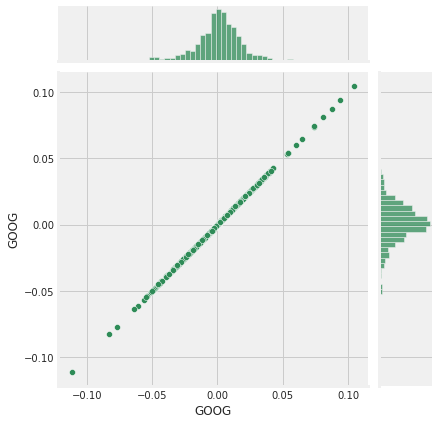

In [91]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', stock_returns, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


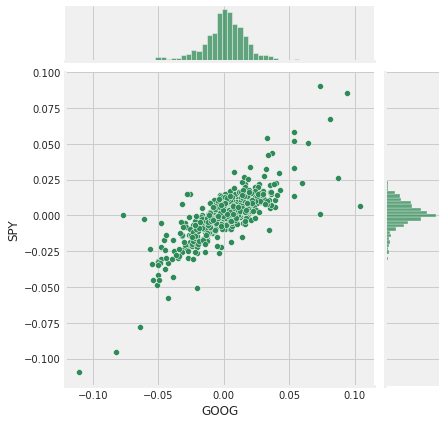

In [93]:
# Comparing Google to SP500
sns.jointplot('GOOG', 'SPY', stock_returns, kind='scatter', color='seagreen')

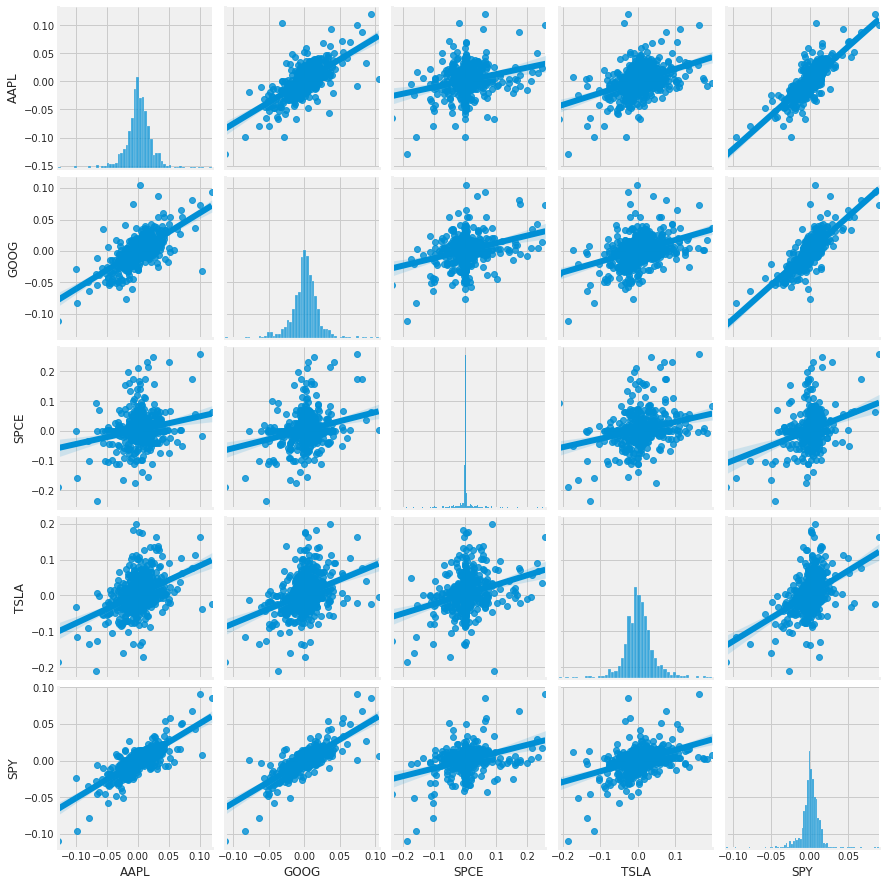

In [94]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(stock_returns, kind='reg')

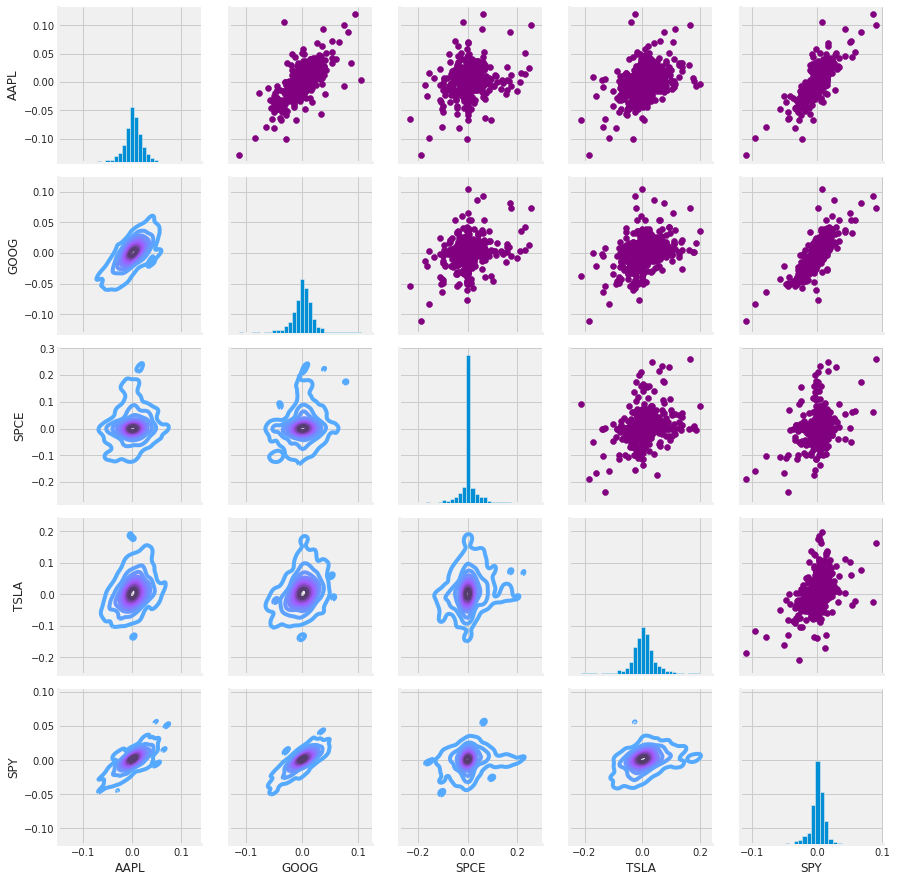

In [96]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

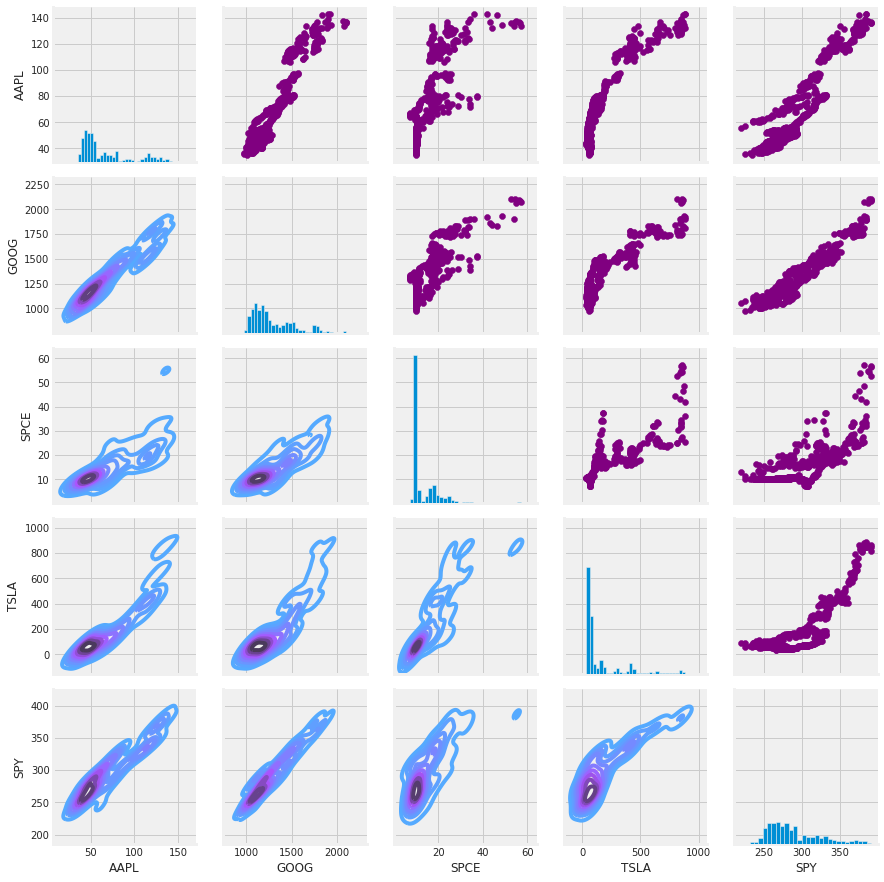

In [97]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

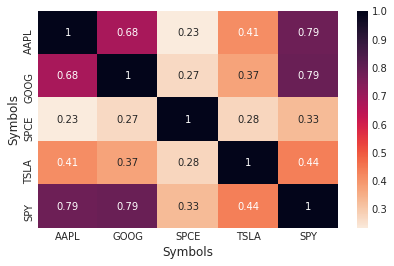

In [103]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(stock_returns.corr(), annot=True, cmap='rocket_r')

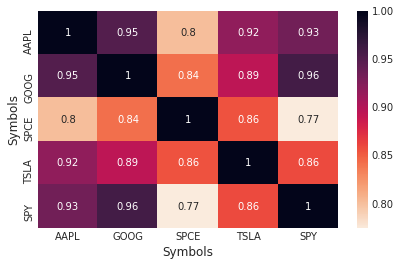

In [102]:
sns.heatmap(closing_df.corr(), annot=True, cmap='rocket_r')

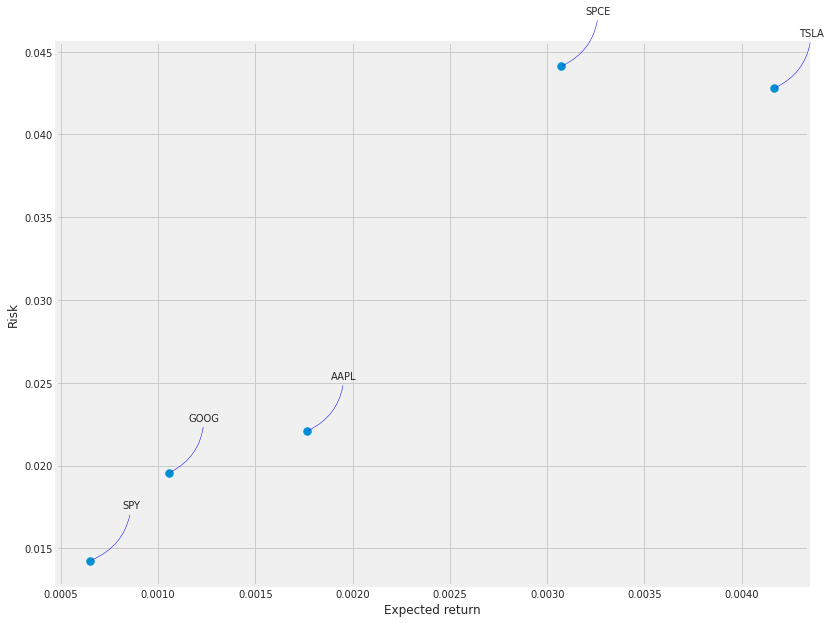

In [104]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = stock_returns.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))